<center><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width=600></center>

# Introduction

In this third tutorial notebook we introduce you to the statistical concepts required for **Statistical Inference** in data science.


## What is Statistical Inference?

Statistical inference describes the process where conclusions about a population can be formed, based on certain statistics calculated from a sample of that population.

It focuses around three major goals:
   1. Estimation of unknown parameters of the statistical model
   2. Select the best model for your data
   3. Do predictions with your model

And the two main approaches to statistical inference are:
  - Likelihood inference
  - Bayesian inference

There are important statistical concepts that need to be understood in order to make statistical inference. The following concepts will be covered initially:    
  - [Law of Large Numbers (LLN)](#Law-of-Large-Numbers-(LLN))     
  - [Central Limit Theorem (CLT)](#Central-Limit-Theorem-(CLT))     
  - [Estimation](#Estimation)     
  - [Frequentist vs Bayesian Approach to Statistical Inference](#Frequentist-vs-Bayesian-Approach-to-Statistical-Inference)   


# Law of Large Numbers (LLN)

The LLN theorem treats about an experiment that is repeated large number of times. 

It states: **the relative frequency of an event A approaches its true probability as the number of trials increases**.  
  
For this to be true, all trials must be identical and independent.

Mathematically: \
$$\overline{x} \to \mu$$  
as   
$$n \to \infty$$
$$\overline{x} = \frac{\sum_{i=1}^{n}(x_{i})}{n}$$

where $\mu$ is the true average, $n$ is the number of trials, and $x_{i}$ is the experiment value in trial $i$.

## LLN Example - Rolling dice
To illustrate the LLN with an example of rolling a die, we can ask the question,
what would be the expected average outcome of rolling a dice?

(1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5
*We already know this before the experiment is performed!*

According to LLN, when we throw the dice a large number of times, the average of the observed outcomes will be close to expected value. The more times we throw the dice, the closer sample mean gets to the true mean, following the green line on the graph below

<center><img src=https://i.imgur.com/G5Avq9O.png width=600></center>




# Central Limit Theorem (CLT) 

The central limit theorem is a key concept in probability theory. Did you ever wonder why you hear so much about normal distribution, but not other distributions?
The answer is behind central limit theorem.

The theorem states that **the sampling distribution of the sample mean is at least approximately, normally distributed, regardless of the distribution of the underlying random sample**
Again, it holds for variables that are independent and identically distributed.

This is very powerful statement. Assume you will repeat certain experiment many times. At each step you will calculate mean value for this experiment. The distribution of this mean will always be approximately normal. **It doesn't matter what your underlying distribution is.**
It implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions. Even when this distribution is complicated, or unknown.


![Source: https://en.wikipedia.org/wiki/Central_limit_theorem](https://i.imgur.com/kGryqBl.png)

The graphs below demonstrate that the frequency of numbers generated from a normal distribution using `norm.rvs()`, tends to a normal distribution (bell shaped curve), with an increasing number of repetitions (from 10 to 10000).

![](sns_plot.png)

## Theorem

Let's get back to law of large numbers. According to it, the population mean $\mu$ can be approximated by the mean of the sampling distribution:

$$\mu_M = \mu$$

The variance of the sampling distribution is defined as the population variance divided by the sample size:

$$\sigma^{2}_M = \frac{\sigma^{2}}{N}$$

The standard deviation of the sampling distribution of the mean is then:

$$\sigma_{M}=\frac{\sigma}{\sqrt{N}}$$


The larger the sample size, the smaller the standard deviation of the sampling distribution of the mean.


![](https://i.imgur.com/TJHI1oF.png)


## Rolling dice CLT Example

The CLT states that if n is large enough (rule of thumb: n > 30), the sample mean 

$\overline{\mathbf{X}}$ 

has a normal distribution (bell curve)

In the diagram below, as the number of die rolls (samples) increases, the sampling distribution becomes closer to normal distribution.


![Source: http://www.muelaner.com/wp-content/uploads/2013/07/central-limit-theorem.png](https://i.imgur.com/IX7VlI3.png)

## Exercise

Consider taking random samples of various sizes n from an exponential distribution. 

At what sample size n does the normal distribution make a good approximation to the actual distribution of the sample mean?  

Plot the histogram of the sample means.   

Outline your approach in detail.

Hint: first read the two examples of a possible approach: https://online.stat.psu.edu/stat414/lesson/27

In [9]:
# your code here

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon
# Central Limit Theorem: Simulate an Exponential Distribution
from scipy.stats import expon
# Set up matplotlib to show plots inline if using Jupyter notebooks
%matplotlib inline

# Define the rate parameter (lambda) for the exponential distribution
# and calculate the mean (1/lambda)
sample_size = 40  # The number of observations in each sample
lambda_rate = 0.2  # Rate parameter for the exponential distribution
exp_mean = 1 / lambda_rate  # Mean of the exponential distribution

# Create a list to store the sample means
sample_means = []

# Generate sample means from the exponential distribution 100,000 times
# to simulate the sampling distribution of the sample mean
for _ in range(100000):    # _ means ignoring the loop variable
    # Generate a sample of 'sample_size' from the exponential distribution
    sample = np.random.exponential(size=sample_size, scale=exp_mean)
    # Calculate the sample mean and append to the list of sample means
    sample_means.append(sample.mean())

# Calculate the overall mean of the sample means for reference
np.mean(sample_means)

np.float64(4.998420898031001)

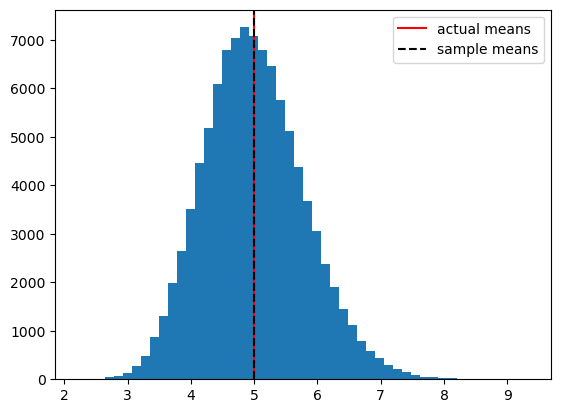

In [25]:
# your code to create plot here

# visualize means in a histogram along with actual mean value and mean of sample means
plt.figure()
plt.hist(sample_means, bins=50)
plt.axvline(x=exp_mean, color='r', label='actual means')
plt.axvline(x=np.mean(sample_means), color='k', ls='--', label='sample means')
plt.legend()

## Exercise

Sampling Distribution
Assume that the weights of 10-year-old children are normally distributed with a mean of 90 and a standard deviation of 36. 

What is the sampling distribution of the mean for a sample size of 9? 

What are its mean, and standard deviation?

__Your Solution here:__
    
The mean of the sampling distribution of the mean is also 90. 

The standard deviation of the sampling distribution of the mean is sigma = 36/sqrt(9) = 12

Therefore, the sampling distribution of the mean is a normal distribution N(90,144)

In [35]:
# your code here

from scipy.stats import norm

pop_mean = 90
sample_size = 9
pop_std = 36/np.sqrt(sample_size)

norm.stats(loc=pop_mean, scale=pop_std)

(np.float64(90.0), np.float64(144.0))

## Summary of LLN and CLT

Both theorems tell us that given a sufficiently large amount of data points, those data points will result in predictable behaviors.

* CLT shows that as a sample size tends to infinity, the **shape of the sample mean distribution will approach the normal distribution.**
* LLN shows you where the **center of that normal curve** is likely to be located.


# Estimation

**Estimation** is a data analysis framework for planning experiments, analyzing data and interpreting results.   
There are numerous estimation procedures that can be used to calculate the value of some property of a population from observations of a sample drawn from the population.      
An estimate of a population parameter may be expressed in two ways: [point estimates](#point_estimates) and [interval estimates](#interval_estimates), which are covered below.

**The main point of estimation is to draw information from obtained data**.  


**Statistical inference** refers to the process of drawing **conclusions from the model estimation.**


Keep in mind: any data is considered a realization of a random variable coming from a certain distribution.

## Estimators and Estimates

Everything in machine learning revolves around estimating parameters. You will often hear about weights or coefficients in neural networks. Those are the estimates.

Now, let's make a distinction between an estimate and an estimator.

**An Estimator:** is a statistic (arbitrary function of a random sample), used to extract information of a parameter from the random sample.
It is expressed as a function of X.

**An Estimate:** is the value of the evaluated estimator computed based on the data (realizations of the random sample)
It is computed based on $x_1, x_2, ..., x_n$
and is usually denoted by $\hat{\theta}$ for a parameter $\theta$

An estimator is a function, and an estimate is a value of this function. Usually we are interested in estimates that maximize certain function.

Training machine learning models is simply a process of finding the best estimates.


There are two types of estimates: 

  * Point estimate: single value 
  * Interval estimate: defined by lower and upper limit

![Source: http://www.cqeacademy.com/wp-content/uploads/2017/12/Point-Estimate-Interval-Estimate.jpg](https://i.imgur.com/2RdEuDg.png)





## Point Estimates 


**A point estimator uses the sample data to calculate a single value for the "best guess" of an unknown parameter.**

An example of a point estimator of the population mean is the sample mean: $\bar{X}=\frac{1}{n} \sum X_{i}$

A sample of height 34 male freshman students was obtained:

![](https://i.imgur.com/CjmDfUq.png)


If one wanted to estimate the true mean of all male freshman students, you mgight use the sample mean as apoint estimator of the true mean:

Sample mean = $\bar{x}$ = 182.44



## Interval Estimates 

**In contrast to point estimation, interval estimators use the sample data to calculate an interval of possible values of an unknown parameter.**


This means that the interval for the "best guess" of the unknown parameter also comes with a **confidence interval (when using frequentist methods)**, which is the confidence level that the true parameter is inside the proposed range.

### Confidence Intervals

**A confidence interval refers to the probability that a population parameter will fall between a set of values for a certain proportion of times.**

The confidence interval is used to measure the degree of uncertainty or certainty in a sampling method and can take any number of probability limits, with the most common being a 95% or 99% confidence level.

Confidence intervals are conducted using statistical methods, such as a t-test.

**Remember: interval estimates have an attached confidence level used to express the precision and uncertainty associated with a particular sampling method.**


To summarize, interval estimate consists of three parts:  

  1. Statistic: point estimate     
  2. The confidence level: commonly 95%     
  3. Margin of error: critical value x standard deviation     


![](https://i.imgur.com/h8Hs107.png)


![](https://i.imgur.com/afR9sOM.png)

### Example: Confidence Interval under Normal Distribution

As mentioned above, a confidence interval refers to the probability that a population parameter will fall between a set of values for a certain proportion of times. 

Therefore, a 95% confidence interval for the standard normal distribution is the interval (-1.96, 1.96), since 95% of the area under the curve falls within this interval. 

This is illustrated in the image below. Remember that the standard normal distribution has 

mean = 0 and standard deviation = 1. 


![](https://i.imgur.com/z2Ypxz3.png)


To calculate the 95% confidence interval for the standard normal that we can see in the image above, we can use the `norm.ppf()` function. 


Remember that `norm.ppf()` returns a value in standard deviations. 

The input to the `norm.ppf()` function is the confidence interval we wish to find converted into decimal.    

However, we must remember that the confidence interval is spread around the mean, which means that we must deduct half the unwanted area off each side:

In [36]:
from scipy.stats import norm

norm.ppf(0.975) #95% confidence interval, right side

np.float64(1.959963984540054)

In [37]:
norm.ppf(0.025) #95% confidence interval, left side

np.float64(-1.9599639845400545)

### Exercise
Point and interval estimates
State for each statement whether it is TRUE or FALSE and explain why.

a. When the margin of error is small, the confidence level is high.

__Your Solution here:__
FALSE



b. The 95% CI is wider than the 99% CI (given all the rest the same).

__Your Solution here:__
FALSE


c. When the margin of error is large, the confidence interval is large (wide).

__Your Solution here:__
TRUE



d. If the sample size increases, the CI becomes wider.

__Your Solution here:__
FALSE



e. A confidence interval is a point estimator.

__Your Solution here:__
FALSE



f. A sample mean is an example of a point estimator.

__Your Solution here:__
TRUE


### Exercise

Confidence intervals
A population is known to be normally distributed.

Compute the 95% confidence interval on the mean based on the following sample of nine: `[8, 9, 10, 13, 14, 16, 17, 20, 21]`

Now compute the 99% confidence interval using the same data.

In [45]:
samples = [8, 9, 10, 13, 14, 16, 17, 20, 21]

# your code here

#Confidence Intervals

#a) Compute the 95% confidence interval on the mean based on the following sample of nine: 8, 9, 10, 13, 14, 16, 17, 20, 21.
norm.ppf(0.975, loc=np.mean(samples), scale=np.std(samples))

#remember for 95% conf interval on two sides we use norm.ppf(0.975) 
#Because we deduct half of 0.05 from both upper and lower end, instead of deducting the whole 0.05 from one end. 

np.float64(22.878558613115608)

In [44]:
#remember for 99% conf interval on two sides we use norm.ppf(0.995) 
#Because we deduct half of 0.01 from both upper and lower end, instead of deducting the whole 0.01 from one end. 
norm.ppf(0.995, loc=np.mean(samples), scale=np.std(samples))

np.float64(25.598576641445096)

## Construction of Estimators: Methods

* **Maximum likelihood:**
  Finds maximum of the likelihood function to estimate parameters of probabaility distribution. Its goal is to find a model under which observed data is most probabale.

* **Method of Moments:**
  Equates values of sample moments to population moments. Moments are the functions describing the parameter. Mean, Variance, Skewness, and Kurtosis are all moments.

* **Bayesian Methods:**
  Introducing a frequency function for the parameter being estimated.


## Good Estimators

The two main characteristics of what a "good" estimator is, are consistency and unbiased.


### Consistency

**Consistency:** the larger the sample size the more “accurate” the estimate.

The more data you collect, a consistent estimator will be close to the real population parameter you’re trying to measure.

![](https://i.imgur.com/YaoQYKk.png)



### Unbiased

**Unbiased:** the expected value equals the true value.

On average, it hits the true parameter value. Independent of sample size.
For an unbiased estimator we are looking for the most efficient (estimates the quantity of interest in some “best possible” manner.)

![](https://i.imgur.com/RogUIrc.png)



### Example of "good estimator"

![Source: https://eranraviv.com/wp-content/uploads/2014/05/Unbiased-and-Consistent.png](https://i.imgur.com/XYJbtuq.png)


# Frequentist vs Bayesian Approach to Statistical Inference

Both the frequentist and bayesian inference approaches assess the probability of future observations based on some observations or hypothesis.

**The frequentist approach does this by interpreting the likelihood of an event as relative frequency of the incidences of the event in similar and independently repeated experiments.** 

In short, according to the frequentist definition of probability, only repeatable random events (like the result of flipping a coin) have probabilities. These probabilities are equal to the long-term frequency of occurrence of the events in question.

This approach starts with an abstract experiment of what would be observed if one assumes something, and only then compares the outcomes of the abstract experiment with what was actually observed.


**The Bayesian approach on the other hand, starts from what has been observed and assesses possible future outcomes.**

A summary of the differences and similarities between the two approaches is listed here:

![](https://i.imgur.com/hIvZ6Hh.png)

## Bayes' Rule 

The Bayesian approach to statistical inference is based on the Bayes' Rule:
$$P(A \mid B)=\frac{P(B \mid A) P(A)}{P(B)}$$
where:

  - $A$ and $B$ are events
  - $P(B)$ is not $0$

$P(A)$ and $P(B)$ are the unconditional probabilities of A and B occurring
$P(A|B)$ is the conditional probability of A occurring, given that B occurs
$P(B|A)$ is the conditional probability of B occurring, given that A occurs

$P(B) = P(B|A)*P(A) + P(B|A-)*P(A-)$

$P(A|B) = 1 - P(A-|B)$

**Bayesians view probabilities as a more general concept. You can use probabilities to represent the uncertainty in any event or hypothesis.**


Another way of looking at the Bayes' formula when data is involved, is that the newly collected data makes the probability distribution over the parameter’s true (unknown) value narrower. 

You do the updating process from newly collected data by applying Bayes’ theorem to each possible value of the parameter, to update the entire probability distribution:

$$P(Parameter | Data)=\frac{P(Data | parameter) P(Parameter)}{P(Data)}$$



## Exercise

Solve the following questions using the [bayes rule](#Bayes'-Rule) from above.

If the probability of spots given smallpox is 0.9, the probability to smallpox is 0.001, and the probability of spots in 0.081

What is the probability of smallpox given spots?

In [47]:
#your code here:
0.9*0.001/0.081
#likelihood = prob of spots given smallpox.


#prior = prob of smallpox.


# marginal likelihood = prob of spots.


# find posterior = prob of smallpox given spots.


0.011111111111111112

## Exercise

Following on the exercise above, if the probability of spots given chicken pox is 0.8, and the probability of chickenpox is 0.1

What is the probability of chickenpox given spots?

In [51]:
#your code here:
0.8*0.1/0.081

0.9876543209876545

This chapter on Frequentist vs Bayesian inference serves as only an introduction to the topic.

# Inferential Statistics


**Inferential statistics** is the process of taking samples from a larger population and using that data to draw conclusions about the population, make decisions on the basis of those conclusions, and even predict future behaviour.

In other words, inferential statistics is the logical process of drawing general conclusions based on specific pieces of information (data)


There are important statistical concepts that need to be understood in order to make inductive reasoning.

The following concepts will be covered here:
  - [Experimental Design](#Experimental-Design)
  - [Bootstrapping](#Bootstrapping)
  - [Permutation Tests](#Permutation-Tests)

# Experimental Design 


**Experimental design refers to how participants are allocated to the different groups in an experiment.**

We do experiments to learn about causality, not just correlation, between variables.

![source: https://imgs.xkcd.com/comics/correlation.png](https://i.imgur.com/YNA7Ydk.png)

**Experiments test whether the independent variable has an effect on the dependent variable in the hypothesis.**

Levels of the independent variable are randomly assigned, and the dependent variable is measured.


For example, we may wish to test the hypothesis:
“Vitamins make you smarter”

In order to do this, we will need to design the experiment in a way that allocates participants into different groups.

![](https://i.imgur.com/FFSQxGZ.png)


## Common Experimental Designs


Two common experimental designs are the A/B and A/A testing.


**A/B Testing** is (also known as split testing) allocates one group of participants to variant A and the other group of participants to variant B of the experiment. This allows the designer to compare two versions of a single variable to determine which one of the two variants is more effective.


**A/A Testing** splits participants into two different groups, but applies them the same treatment.


Participants will first be treated with one variant of the experiment, and then with another. 

The A/A test is used to validate the results of A/B test.

We want to see if there is noise in the data, instead of signal. 

Comparing results of A/A and A/B tests allows you to quickly see whether the treatment indeed had an effect.

Ideally you want to find that there is no difference between both groups in A/A test. 

Seeing that you get roughly the same performance from each variant allows you to validate setup for A/B test.


The experiments can also be setup as:

**Between subjects:** Participants are split into two groups. Each group receives different variant of a treatment. Comparing results of each groups allows you to draw conculsion on how effects of two variants vary.
Between subject tests are great to get an unbiased view of what approach works.


**Within subjects:** All participants get both variants of a treatment. First they will be exposed to variant A, and then to the variant B. Relevant metrics are collected after every stage.
Within subject studies are great when you need an exact comparison. They are, however, more prone to bias.


In our vitamins example, between subjects and within subjects experiments could be set up like this:

![](https://i.imgur.com/0a4XtW9.png)


## Treatment and Control Groups

The **treatment group** is the group that will be applied a manipulation (also called treatment conditions)


The **control group** is the group where no intervention is made.
This group is used to remove concerns about the effects of merely participating in the study.


The **control conditions** of the control group are very important because minimize the changes in all other variables except the one being tested during an experiment.



![](https://i.imgur.com/jEYj3Cl.png)

In our vitamins example, good control conditions would allow to vary ONLY the independent variable, i.e. the pills type.


We don’t want to test whether eating something affects intelligence, or whether sitting in the lab for a while affects intelligence. We want to be sure that any changes in the dependent variable (IQ) seen in the treatment group are a result of the independent variable (vitamins) only.


## Randomized Controlled Trial (RCT)

A randomized controlled trial (RCT) is an experiment performed on human subjects (usually patients or customers) in order to assess the efficacy of a treatment (or intervention) for some condition.

Two key features:
1. The new treatment is given to a group of patients, the treated group, and another treatment (standard or placebo treatment) is given to another group of patients, the control group, at the same time.

2. Patients are allocated to one group or another by randomization.


### Example

A company developed a new pacemaker. In order to get market approval they need to show that the new pacemaker is as good and as safe as the existing pacemaker, also referred as gold standard.

They have to enrol a certain amount of subjects (defined by a sample size calculation, see later).

The enrolled subjects are randomized to either the new pacemaker or the gold standard.

Both groups need to be treated exactly the same, of course except of the implanted pacemaker.

## Random Assignment

### Exercise

Do these methods represent a way to randomly assign conditions?

  - Hour of day the participant enters the study. 
  - Participant’s choice of whether to have the treatment. 
  - Date the participant signed up for your website. 
  - 50% of participants chosen through a random generator.

__Your Answers Here__



## Blinding

Blinding means that all information about the group allocation is kept away from the study participant, to reduce or eliminate bias.

**Single-blinded**: Patients have no information that could influence the results, e.g. the received treatment.

**Double-blinded**: Patients and experimenter have no information that could influence the results.

**Triple-blinded**: Patients , experimenter and the committee monitoring the study have no information that could influence the results.

The analyst/data scientist should always be blinded!

Especially if s/he is working for a company which is dependent on the outcome of the experiment.

### Exercise

You have developed a new flu vaccine. In order to test the effectiveness of your new treatment, you run an experiment, giving half of your participants the flu vaccine and the other half a fake vaccine that will have no effect.

- Is this single, double, or tripe blinding?

__Your Answers Here:__
    


Why is it important for your study, that participants in the control group do not realize they have received a fake vaccine and are not protected against the flu?

__Your Answers Here:__



Give an example of how you could run the flu vaccine that is double-blind?

__Your Answers Here:__



## Types of Variables: level of measurement

Let's recall the variable types. The variables can be numerical or categorical.

Numerical variables can take any value. They split to:
    
* **Interval**: numerical values measured along the scale, where all points are equidistant.
“+” and “-” operations are meaningful, but “ ·” and “÷” are not
E.g. year, credit score, temperature in Celsius

* **Ratio**: interval variables with a clear definition of 0. Absolute zero exists and has a meaning.
“+”,  “-”, “ ·”  and “÷” are meaningful operations
E.g. age, income, temperature in Kelvin


Categorical variables take discrete values. They split to:
* **Nominal**: two or more categories, without an order
E.g. nationality, language, colour
* **Ordinal**: two or more categories, with an order or ranking
E.g. finishing place in a race (1st, 2nd); company size (1-50, 51-200 employees)


# Bootstrapping

Bootstrapping and permutation are two resampling methods.

The basic idea behind bootstrapping comes from the issues associated with repeated sampling from a population. For a data scientist, it is often desired to do so. However, it may be impractical, expensive or not possible (sample items destroyed during sampling).

Thus if we cannot resample from the population (the true sampling distribution is unavailable), **we resample from the best approximation of the population we have - which is the sample itself (producing a bootstrap distribution).**

Bootstrapping allows you to estimate the distribution of almost any statistic using random sampling methods. We can use it to estimate confidence intervals around point estimates.

### Bootstrapping Approach

To understand how process of resampling from the sample itself works, we will cover it in a step-by-step approach.

  1. Use the original sample to represent the population.
  2. Take repeated samples from the orginal sample (sample of sample is called re-sample).
  3. Use these re-samples to calculate an estimate for the population statistic (mean or median)
  4. Gather all calculated values to  produce a distribution of estimates (e.g. distribution of means or medians)
  
    → by taking 0.025 and 0.0975 quantiles of the resampling distribution we can find a 95% confidence interval for the original population estimate.

**Bootstrapping can be used with any estimate: mean, variance, skewness etc.**

![](https://i.imgur.com/TWh7y0z.png)

### Exercise

Bootstrapping:
  - Take the sample: 8, 12, 58, 94, 103, 115, drawn from a population with unknown distribution
  - Re-sample with replacement 10000 times with sample(x, size, replace=TRUE).
  - Compute a vector with the means for each re-sample.
  - Plot their sample means.

In [63]:
#your code here:

sample = [8, 12, 58, 94, 103, 115]

sample_means = []


### Bonus Exercise

The next step in this bootstrapping approach would be to calculate a 95% confidence interval for the mean of this population - you will learn how to calculate confidence intervals in the bootcamp.

However, if you are familiar with calculating confidence intervals already, please complete the final (bonus) part of this exercise by:
  - Calculating a 95% confidence interval for the mean of this population

In [ ]:
# your code here

<YOUR CODE HERE>

# Permutation Tests

In addition to bootstrapping, another resampling method is permutation tests.

This is another way of making decisions about whether the differences we observe arose due to randomness or due to our treatment conditions.

If the treatment had no effect, then observations should randomly fall into the two groups, and any of these rearrangements (permutations) would be equally likely.

Like bootstrapping, we don’t need to worry about assumptions or what distribution our data follow.

We only rely on the possible rearrangements of these observations into the two groups.

For hypothesis testing:

  - $H_0$: The observations are exchangeable across groups

  - $H_1$: The observations are not exchangeable across groups (the current arrangement into groups was not due to chance)



For a visual explanation of the intuition behind permutation testing, please **take a look at this helpful [link](https://www.jwilber.me/permutationtest/).**


### Exercise

Run the code given below to create a sample dataset for an experiment on plant growth.

In [ ]:
import pandas as pd

x = range(30)
weight = [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 
          5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 
          4.32, 4.69, 6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 
          6.15, 5.80, 5.26]
groups = list(np.repeat(['ctrl'], 10)) + list(np.repeat(['trt1'], 10)) + list(np.repeat(['trt2'], 10))

plant_growth = pd.DataFrame({
    'X': x,
    'weight': weight,
    'groups': groups
})

plant_growth

You would like to run a permutation test to decide if the treatment2 had an effect.
In other words, is this grouping of observations into treatment and control groups likely to have happened randomly?

To do so, you begin by:

- Getting all possible rearrangements of these observations into the two groups
- For each rearrangement (permutation), calculate the difference in group means
- Compare the difference we observed to the distribution of possible differences in all permutations (histograms)

In [ ]:
# Permutation test for difference between two groups
from itertools import combinations

# our data
x = plant_growth[plant_growth.groups=="ctrl"]['weight']
y = plant_growth[plant_growth.groups=="trt2"]['weight']

n = len(x) + len(y)

# 1) get all the possible combinations of 10 observations
# using combination instead of permutation because we
# don't care about the order of all 10 obs, just whether
# they are in group 1 or group 2
perm_control = list(combinations(x.tolist() + y.tolist(), n//2))
perm_control = np.array(perm_control)

# trick to get the corresponding observations for treatment group
perm_training = np.flip(perm_control, axis=0)

In [ ]:
# For each rearrangement (permutation), calculate the difference in group means.
mean_diff_actual = np.mean(perm_control, axis=1) - np.mean(perm_training, axis=1)
mean_diff_actual

In [ ]:
mean_diff_obs = np.mean(x) - np.mean(y)
mean_diff_obs

In [ ]:
sns.histplot(mean_diff_actual, bins=30)
plt.axvline(mean_diff_obs, color='red', linestyle='--');

### Bonus Exercise

We will not cover the next steps needed to complete the permutation tests now - you will learn about them in the bootcamp.


However, if you are familiar with confidence intervals and p-values already, please complete the permutation test exercise by:

- See what range 99% of these group means fall into.
- See if the difference in means we observe in the data falls within this 99% range.
- Alternatively, to get a p-value, see what the probability of observing a difference of the same or larger magnitude than what we saw in the data.

In [ ]:
### Bonus
## rest of this exercise, save for in-class
# get critical values for a 2-sided test
# that is, which values are the interval that contains
# 95% of permutation mean differences?

<YOUR CODE HERE>

In [ ]:
# plot the interval and the difference in means that
# we observed
<YOUR CODE HERE>

In [ ]:
# how many permutations had a mean diff equal to
# or greater than the one we observed?

<YOUR CODE HERE>


# dividing this by the total number of permutations
# tells us how likely it was that our observation arose by chance
# (if we drew a permutation at random) - our p-value

<YOUR CODE HERE>